In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import sys
import re
import string
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

import seaborn as sb
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [ ]:
import pandas as pd

df = pd.read_csv('/gdrive/My Drive/ML/mbti_1.csv')
df1 = df.copy()

In [ ]:
df1.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:

df2 = df1.copy()
df1.shape, df2.shape

((8675, 2), (8675, 2))

In [ ]:
import numpy as np

mbti_type = np.unique(np.array(df1['type']))
mbti_type

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


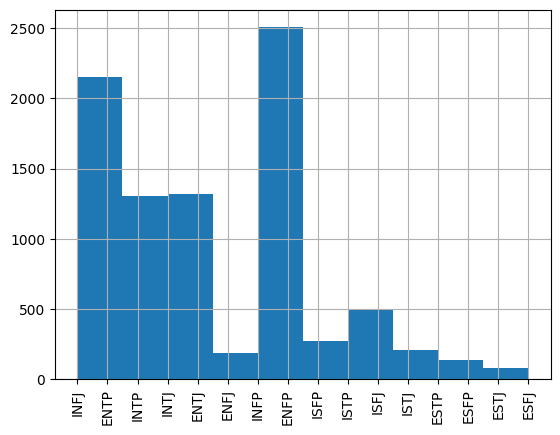

In [ ]:
import matplotlib.pyplot as plt
print(df1.type.value_counts())
df1.type.hist(xrot=90)
plt.show()

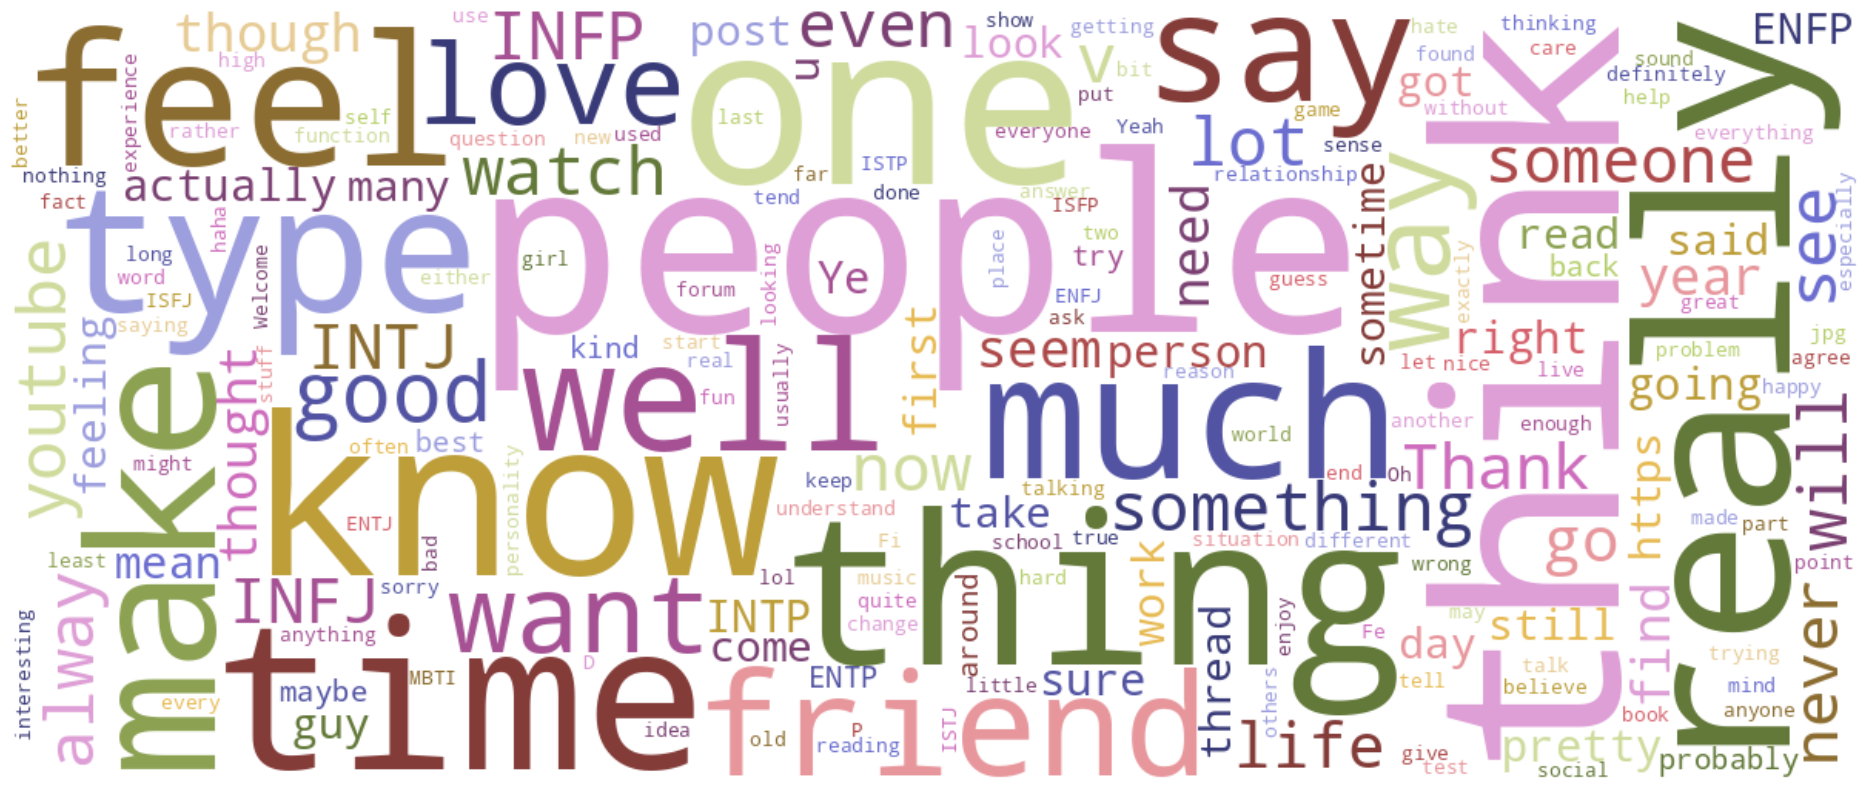

In [ ]:
import seaborn as sb
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))


plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [ ]:
df1['ie'] = df1.type
df1['ns'] = df1.type
df1['ft'] = df1.type
df1['pj'] = df1.type

for i, t in enumerate(df1.type):
    if 'I' in t:
        df1.ie[i] = 'I'
    elif 'E' in t:
        df1.ie[i] = 'E'

    if 'N' in t:
        df1.ns[i] = 'N'
    elif 'S' in t:
        df1.ns[i] = 'S'

    if 'F' in t:
        df1.ft[i] = 'F'
    elif 'T' in t:
        df1.ft[i] = 'T'

    if 'P' in t:
        df1.pj[i] = 'P'
    elif 'J' in t:
        df1.pj[i] = 'J'


posts = df1.posts.values
yIE = df1.ie.values
yNS = df1.ns.values
yFT = df1.ft.values
yPJ = df1.pj.values
y = df1.type

print(posts)

["'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..

In [ ]:
def get_types(row):
    t=row['ie']
    u=row['ns']
    v=row['ft']
    w=row['pj']

    I = 0; N = 0
    T = 0; J = 0

    if t == 'I': I = 1
    elif t == 'E': I = 0
    else: print('I-E not found')

    if u == 'N': N = 1
    elif u == 'S': N = 0
    else: print('N-S not found')
    if v == 'T': T = 1
    elif v == 'F': T = 0
    else: print('T-F not found')

    if w == 'J': J = 1
    elif w == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'EI':I, 'SN':N , 'TF': T, 'JP': J })

df1 = df1.join(df1.apply (lambda row: get_types (row),axis=1))
df1.head(5)

,type,posts,ie,ns,ft,pj,EI,SN,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,0,1,1,1


I    6676
E    1999
Name: ie, dtype: int64

N    7478
S    1197
Name: ns, dtype: int64

F    4694
T    3981
Name: ft, dtype: int64

P    5241
J    3434
Name: pj, dtype: int64



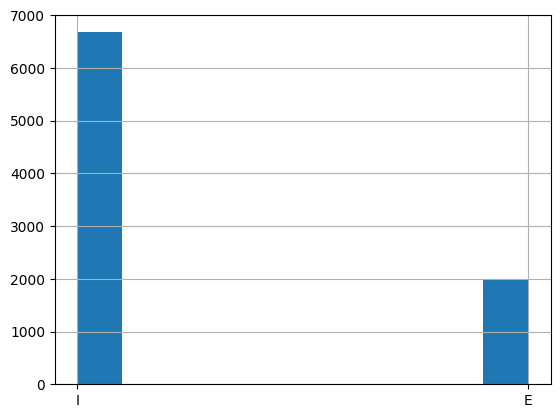

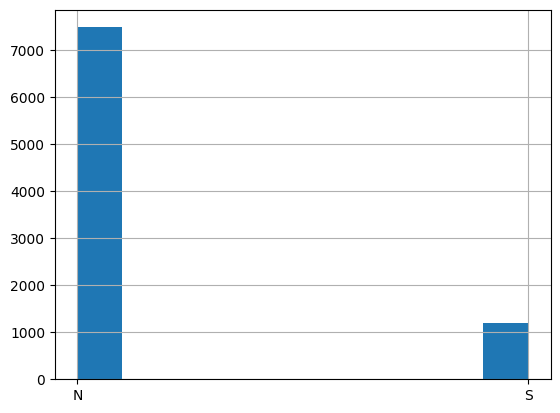

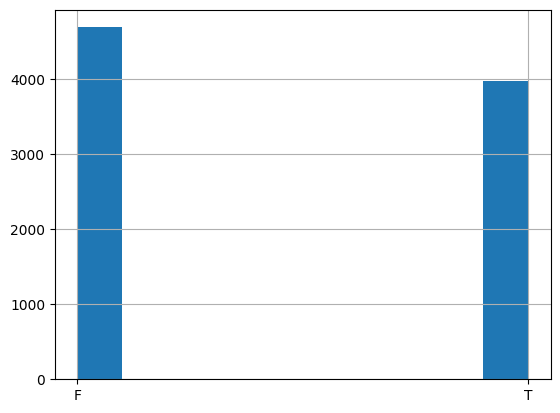

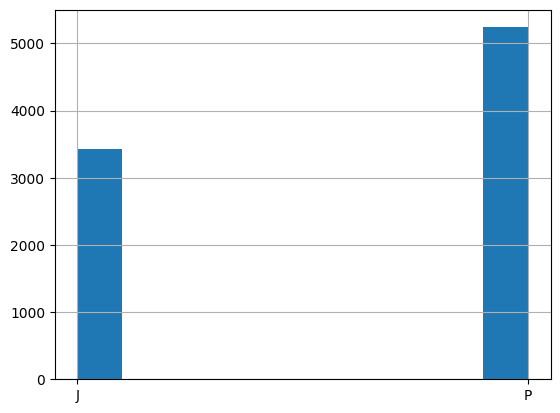

In [ ]:
print(df1.ie.value_counts(), end='\n\n')
print(df1.ns.value_counts(), end='\n\n')
print(df1.ft.value_counts(), end='\n\n')
print(df1.pj.value_counts(), end='\n\n')

df1.ie.hist(); plt.show()
df1.ns.hist(); plt.show()
df1.ft.hist(); plt.show()
df1.pj.hist(); plt.show()

In [ ]:
import re
regexes = [
    r'(?:(\w+)\'s)',
    r'(?:\s(\w+)\.+\s)',
    r'(?:\s(\w+),+\s)',
    r'(?:\s(\w+)\?+\s)',
    r'(?:\s(\w+)!+\s)',
    r'(?:\'+(\w+)\'+)',
    r'(?:"+(\w+)"+)',
    r'(?:\[+(\w+)\]+)',
    r'(?:{+(\w+)}+)',
    r'(?:\(+(\w+))',
    r'(?:(\w+)\)+)',
    r'(?:(?:(?:[a-zA-Z])*(?:[0-9!"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~])+(?:[a-zA-Z])*)+)',
    r'([a-zA-Z]+)',
]

#compiling regular expression
regex = re.compile(r'(?:'+'|'.join(regexes)+')', re.VERBOSE | re.IGNORECASE)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

def preprocess(documents):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    punctuation = list(string.punctuation)
    swords = stopwords.words('english') + ['amp'] + ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'feburary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',  'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',  'jan', 'feb', 'mar', 'apr', 'may', 'jun' 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'tommorow', 'today', 'yesterday'] + ['mr', 'mrs']


    processed_documents = []
    for i,document in enumerate(documents):
        print('{0}/{1}'.format(i+1, len(documents)))
        tokens = regex.findall(document)
        t_regex = re.compile(r"[^a-zA-Z]")
        document = []

        for token in tokens:
            token = np.array(token)
            token = np.unique(token[token != ''])

            if len(token) > 0:
                token = token[0].lower()
            else:
                continue

            if re.search(t_regex, token) == None and token not in swords:
                token = lemmatizer.lemmatize(token)
                document.append(token)


        document = ' '.join(document)
        if len(document) >= 0:
            processed_documents.append(document)

    print()
    return np.array(processed_documents)



In [15]:
posts =  preprocess(posts)

Streaming output truncated to the last 5000 lines.
3677/8675
3678/8675
3679/8675
3680/8675
3681/8675
3682/8675
3683/8675
3684/8675
3685/8675
3686/8675
3687/8675
3688/8675
3689/8675
3690/8675
3691/8675
3692/8675
3693/8675
3694/8675
3695/8675
3696/8675
3697/8675
3698/8675
3699/8675
3700/8675
3701/8675
3702/8675
3703/8675
3704/8675
3705/8675
3706/8675
3707/8675
3708/8675
3709/8675
3710/8675
3711/8675
3712/8675
3713/8675
3714/8675
3715/8675
3716/8675
3717/8675
3718/8675
3719/8675
3720/8675
3721/8675
3722/8675
3723/8675
3724/8675
3725/8675
3726/8675
3727/8675
3728/8675
3729/8675
3730/8675
3731/8675
3732/8675
3733/8675
3734/8675
3735/8675
3736/8675
3737/8675
3738/8675
3739/8675
3740/8675
3741/8675
3742/8675
3743/8675
3744/8675
3745/8675
3746/8675
3747/8675
3748/8675
3749/8675
3750/8675
3751/8675
3752/8675
3753/8675
3754/8675
3755/8675
3756/8675
3757/8675
3758/8675
3759/8675
3760/8675
3761/8675
3762/8675
3763/8675
3764/8675
3765/8675
3766/8675
3767/8675
3768/8675
3769/8675
3770/8675
3771/8675

In [16]:
posts


array(['intj moment sportscenter top ten play experience repeat perc experience immerse last thing infj friend posted facebook committing suicide next day rest sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth game wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier come three item determined type whichever type want would likely use given cognitive function whatnot left thing moderation sims indeed video game good one good one somewhat subjective completely promoting death given favorite video game growing current favorite video game appears late someone thought confidence good cherish time solitude revel within inner world whereas time workin enjoy time worry people always around entp lady complimentary main social outlet xbox live conversation even verbally fatigue really dig part thread requires high backyard roast eat marshmellows backyard conversing somet

In [17]:
cv = CountVectorizer().fit(posts)
X = cv.transform(posts)

In [18]:
tf = TfidfTransformer()
X_tf=  tf.fit_transform(X).toarray()

In [ ]:
print(X)

In [20]:
posts.shape, X.shape, X_tf.shape, yIE.shape, yNS.shape, yPJ.shape, yFT.shape

((8675,), (8675, 75072), (8675, 75072), (8675,), (8675,), (8675,), (8675,))

In [21]:
df1.head()

,type,posts,ie,ns,ft,pj,EI,SN,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,0,1,1,1


In [22]:
xIETrain, xIETest, yIETrain, yIETest = train_test_split(X, yIE)
xNSTrain, xNSTest, yNSTrain, yNSTest = train_test_split(X, yNS)
xFTTrain, xFTTest, yFTTrain, yFTTest = train_test_split(X, yFT)
xPJTrain, xPJTest, yPJTrain, yPJTest = train_test_split(X, yPJ)
xTrain, xTest, yTrain, yTest = train_test_split(X, y)


In [23]:
df1.head()

,type,posts,ie,ns,ft,pj,EI,SN,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,0,1,1,1


In [24]:
df1['EI'] = df1.EI
df1['SN'] = df1.SN
df1['TF'] = df1.TF
df1['JP'] = df1.JP
yEI1 = df1.EI.values
ySN1 = df1.SN.values
yTF1 = df1.TF.values
yJP1 = df1.JP.values

In [25]:
xIETrain, xIETest, yEITrain1, yEITest1 = train_test_split(X, yEI1)
xNSTrain, xNSTest, ySNTrain1, ySNTest1 = train_test_split(X, ySN1)
xFTTrain, xFTTest, yTFTrain1, yTFTest1 = train_test_split(X, yTF1)
xPJTrain, xPJTest, yJPTrain1, yJPTest1 = train_test_split(X, yJP1)

In [26]:
xIETrain.shape, xIETest.shape, yIETrain.shape, yIETest.shape


((6506, 75072), (2169, 75072), (6506,), (2169,))

In [27]:
xNSTrain.shape, xNSTest.shape, yNSTrain.shape, yNSTest.shape


((6506, 75072), (2169, 75072), (6506,), (2169,))

In [28]:
xFTTrain.shape, xFTTest.shape, yFTTrain.shape, yFTTest.shape


((6506, 75072), (2169, 75072), (6506,), (2169,))

In [29]:
xPJTrain.shape, xPJTest.shape, yPJTrain.shape, yPJTest.shape

((6506, 75072), (2169, 75072), (6506,), (2169,))

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [31]:
df1.head()

,type,posts,ie,ns,ft,pj,EI,SN,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,0,1,1,1


In [32]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

xIETrain_smote, yIETrain_smote = smote.fit_resample(xIETrain, yIETrain)
xNSTrain_smote, yNSTrain_smote = smote.fit_resample(xNSTrain, yNSTrain)
xFTTrain_smote, yFTTrain_smote = smote.fit_resample(xFTTrain, yFTTrain)
xPJTrain_smote, yPJTrain_smote = smote.fit_resample(xPJTrain, yPJTrain)

ieModel = MultinomialNB().fit(xIETrain_smote, yIETrain_smote)
nsModel = MultinomialNB().fit(xNSTrain_smote, yNSTrain_smote)
#ftModel2 = MultinomialNB().fit(xFTTrain_smote, yFTTrain_smote)
pjModel = MultinomialNB().fit(xPJTrain_smote, yPJTrain_smote)

from sklearn.linear_model import LogisticRegression

# Model dengan Logistic Regression
#ftModel3 = LogisticRegression(max_iter=1000, random_state=42)
#ftModel3.fit(xFTTrain_smote, yFTTrain_smote)


from sklearn.neighbors import KNeighborsClassifier

# Model KNN
#knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN pada data pelatihan setelah proses SMOTE
#ftModel4 = knn_model.fit(xFTTrain_smote, yFTTrain_smote)

from sklearn.ensemble import RandomForestClassifier

# Model dengan RandomForest
# ftModel5 = RandomForestClassifier(n_estimators=200, random_state=42)
# ftModel5.fit(xFTTrain_smote, yFTTrain_smote)





In [ ]:
# Model dengan RandomForest
ftModel5 = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=5, max_features='sqrt', class_weight='balanced', random_state=42)
ftModel5.fit(xFTTrain_smote, yFTTrain_smote)

In [ ]:
# Model dengan RandomForest tanpa SMOTE
ftModel6 = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=5, max_features='sqrt', class_weight='balanced', random_state=42)
ftModel6.fit(xFTTrain, yFTTrain)

In [ ]:
# Model dengan RandomForest tanpa SMOTE IE
ieModel2 = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=5, max_features='sqrt', class_weight='balanced', random_state=42)
ieModel2.fit(xIETrain, yIETrain)

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Inisialisasi model Neural Network
# ftModel = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam', random_state=42)

# # Melatih model pada data pelatihan yang telah di-SMOTE
# ftModel.fit(xFTTrain_smote, yFTTrain_smote)

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Melatih model pada data pelatihan
ftModel7 = svm_model.fit(xFTTrain_smote, yFTTrain_smote)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.countplot(x=yIETrain, palette='Set1')
plt.title('Original Distribution - IE')

plt.subplot(1, 4, 2)
sns.countplot(x=yNSTrain, palette='Set1')
plt.title('Original Distribution - NS')

plt.subplot(1, 4, 3)
sns.countplot(x=yFTTrain, palette='Set1')
plt.title('Original Distribution - FT')

plt.subplot(1, 4, 4)
sns.countplot(x=yPJTrain, palette='Set1')
plt.title('Original Distribution - PJ')

plt.show()

# Plot SMOTE distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.countplot(x=yIETrain_smote, palette='Set1')
plt.title('SMOTE Distribution - IE')

plt.subplot(1, 4, 2)
sns.countplot(x=yNSTrain_smote, palette='Set1')
plt.title('SMOTE Distribution - NS')

plt.subplot(1, 4, 3)
sns.countplot(x=yFTTrain_smote, palette='Set1')
plt.title('SMOTE Distribution - FT')

plt.subplot(1, 4, 4)
sns.countplot(x=yPJTrain_smote, palette='Set1')
plt.title('SMOTE Distribution - PJ')

plt.show()


In [ ]:
df1.head()

In [ ]:
param = {}
param['n_estimators'] = 200
param['max_depth'] = 8
param['nthread'] = 8
param['learning_rate'] = 0.2

In [ ]:

from xgboost import XGBClassifier

smote = SMOTE(sampling_strategy='auto', random_state=42)

#xIETrain_smote, yEITrain_smote1 = smote.fit_resample(xIETrain, yEITrain1)
#xNSTrain_smote, ySNTrain_smote1 = smote.fit_resample(xNSTrain, ySNTrain1)
xFTTrain_smote, yTFTrain_smote1 = smote.fit_resample(xFTTrain, yTFTrain1)
xPJTrain_smote, yJPTrain_smote1 = smote.fit_resample(xPJTrain, yJPTrain1)

modelXGB = XGBClassifier(**param)
#EIModel = modelXGB.fit(xIETrain_smote, yEITrain_smote1)
#SNModel = modelXGB.fit(xNSTrain_smote, ySNTrain_smote1)
TFModel = modelXGB.fit(xFTTrain_smote, yTFTrain_smote1)
JPModel = modelXGB.fit(xPJTrain_smote, yJPTrain_smote1)

In [ ]:

print("IE NB = ", ieModel.score(xIETest, yIETest))
print("IE RandomForest tanpa SMOTE = ", ieModel2.score(xIETest, yIETest))
print("NS = ",nsModel.score(xNSTest, yNSTest))
#print(ftModel.score(xFTTest, yFTTest))
#print(ftModel2.score(xFTTest, yFTTest))
#print(ftModel3.score(xFTTest, yFTTest))
#print(ftModel4.score(xFTTest, yFTTest))
print("FT Random Forest = ",ftModel5.score(xFTTest, yFTTest))
print("FT Random Forest tanpa SMOTE = ",ftModel6.score(xFTTest, yFTTest))
print("FT model SVM = ",ftModel7.score(xFTTest, yFTTest))
#print(pjModel.score(xPJTest, yPJTest))

In [ ]:

#print(EIModel.score(xIETest, yEITest1))
#print(SNModel.score(xNSTest, ySNTest1))
print(TFModel.score(xFTTest, yTFTest1))
print(JPModel.score(xPJTest, yJPTest1))

In [ ]:

print('MINORITY CLASSES:')
print(f1_score(yIETest, ieModel.predict(xIETest), pos_label='E'))
print(f1_score(yNSTest, nsModel.predict(xNSTest), pos_label='S'))
print(f1_score(yFTTest, ftModel5.predict(xFTTest), pos_label='T'))
print(f1_score(yPJTest, pjModel.predict(xPJTest), pos_label='J'), end='\n\n')

#majority classes
print('MAJORITY CLASSES:')
print(f1_score(yIETest, ieModel.predict(xIETest), pos_label='I'))
print(f1_score(yNSTest, nsModel.predict(xNSTest), pos_label='N'))
print(f1_score(yFTTest, ftModel5.predict(xFTTest), pos_label='F'))
print(f1_score(yPJTest, pjModel.predict(xPJTest), pos_label='P'))

In [ ]:
scores = []

scores.append(cross_val_score(estimator=ieModel, cv=10, X=X, y=LabelEncoder().fit_transform(yIE), scoring='recall'))
scores.append(cross_val_score(estimator=nsModel, cv=10, X=X, y=LabelEncoder().fit_transform(yNS), scoring='recall'))
scores.append(cross_val_score(estimator=ftModel, cv=10, X=X, y=LabelEncoder().fit_transform(yFT), scoring='recall'))
scores.append(cross_val_score(estimator=pjModel, cv=10, X=X, y=LabelEncoder().fit_transform(yPJ), scoring='recall'))

#prining mean and standard deviations for each model
for score in scores:
    print(score.mean())
    print(score.std(), end='\n\n')

In [ ]:
df1.head()

In [ ]:
my_posts ='''Well dang, I'd sure like to know too.|||Why thank you! I used to be so nervous around him, but now it's kinda adorable reading my old high school thoughts on him. I'm glad it's recorded forever on personalitycafe lol.|||And wouldn't it be an even bigger plot twist if they end up engaged to be married? Haha. Forreal though, I had a crush on him for years and I posted it about it on personalitycafe and now we plan on...|||Haha well...There could be the possibility that this thread was over a year ago, and said INTJ makes so much more sense to this girl now and is not worried about whether or not her petty crush is...|||Awwww...That's me. Exactly. This is exactly my thought process about 100% of the time I'm around someone I'm rather fond of. I hate that feeling of...|||I like the idea of that. You should schedule something.|||Lawwwwwl, that's the thread I started!     This whole thread is making me feel so happy and loved.|||http://www.youtube.com/watch?v=8s8YK4R5qa0   This is the most peaceful song I've ever heard.|||I've always felt the exact same way about changing the world!! It's like a fact to me, I know I will. I'm just not sure how. There's no way I could ever cope with passing into non-existence like...|||I don't fucking get ESFP's. Oh my god. I have no idea what motivates those guys to be so intruding or attention-seeking.   Well, this holds true for the one I know...|||I am kind of bossy and protective around my INFP best friend, come to think of it. It's mostly because I know how easily her feelings are hurt, so I try and protect her from that hurt at all costs....|||Said INTJ is now trying to call me. Oh jeez, I want to talk to him, but I'm terrified. I'm literally shaking at the thought of social contact. He was acting really weird today, and I got a vibe that...|||He's never announced something and denied explanation to me before.  That's why I was so confused. We always talk about our dreams with each  other, it's something that deeply fascinated us both. We...|||He's not exactly shy, but he definitely likes the company of himself. I don't know why this would apply at school, though. He's surrounded by people.|||He keeps his head down and speeds up, almost like he's avoiding me. I really just like acknowledgement in some form, it doesn't really matter which one. I really have no idea why he does this. He's...|||I've liked an INTJ for quite a while now, and we've become really great friends. I can't help but feel like we'd be so compatible for each other. We have similar interests, similar music tastes,...|||It's really a complicated story, with a lot of personal motives involved. Trust me though, most people would do the same in my position.|||You know you're an INTP when you're having friend trouble and you wish you could write up and have your friends sign official contracts terminating your friendship/relationship.       God, it...|||Herpy da doo da, Herpy da day. My, oh my, what a wonderful day. Plenty of Derps 'n, herps comin' my way, Herpy da doo dah, derpy da day.|||I believe the idea of love at first sight is completely and totally ridiculous. Love takes a deep mental connection that you obtain from getting to know the person. You can have an extremely strong...|||When are you truly happy? What are you doing? Please describe the scene that is around you.  I am truly happy when I am at peace with my music and the world, when I am completely free the think and...|||If I'm confident in what I'm speaking, then I'm only a little bit nervous. Usually I'm horribly terrified, clam up, and get sick though. :|||The first one most definitely. I'd rather be remembered for something great than be remembered by a few loved ones. It makes a bigger impact on the whole.   Really though, no matter how many people...|||Self-taught pianist and guitarist here. I'm in music theory now, and it's pretty fascinating. Still can't read notes for shit, though. I can, however, play by ear and am quite good at it.|||Hmmmm, I have this problem myself. Nine times out of ten I test as INTP, but this doesn't stop me from wondering. My ENFP friend thinks I'm actually an ENTP, but I challenge her theory by telling her...|||Pottermore says I'm a Ravenclaw. I am pleased with this result.|||I've always been curious...  What do you all think of INTP's? Do you get along splendidly with them? Do you feel like they admire you?   Please, tell me every little observation and thought.|||My mother has always been extremely appalled with my rude behavior towards her and others. She says it will eventually drive away everyone I love. All I really do is just speak my mind.  I...|||My head is unusually large, but I'm an INTP. My cousin ENTP's head is also unusually large, so I just voted for him.|||Meh, I usually score at the end of the Right-Brain spectrum. It was nice to read about what each individual score meant.  Left Brain: 42%  Right Brain: 58%|||I was strongly enticed by the idea of being a vegetarian, and tried it out for a week and a half.   It wasn't temptation that brought me back to the dark side, I just realized I didn't really have...|||I had one for a number of years, but I haven't seen her in over a year. Granted, this was only because my parents had a rather nasty divorce and the Court deemed it necessary.|||I've been teaching myself new piano songs whenever inspiration to do so strikes me. This isn't really new though, I've been doing it for quite a while. I guess you could say I'm only starting to...|||I absolutely adore singing, although I don't think the personality types have too much of a connection with whether or not you like to sing. I think it's mostly about musical ability, and I'm not...|||I love it. I actually have a serial killer encyclopedia that I would carry around with me in sixth grade. Granted, I earned myself quite a few dirty looks, but it was such a fascinating book.|||There are two kinds of people in this world: Those who can extrapolate from incomplete data|||You sound a lot like me. I've always been on the brink about which type I am. I've decided I'm an Introvert because I can't spend more than 20 hours with someone without being completely exhausted....|||My mom is an INFP, but she's totally blunt. She doesn't really care about hurting feelings too much, but is very easily offended. Despite that, she fits just about all of this. She loves science and...|||For some reason I just lovelovelovelove ENTP's so much! They're smart, funny, and just fun. I love being around them and just soaking up their information on random topics.   I say this despite the...|||I absolutely must start a musical revolution. That is all I know.|||http://www.youtube.com/watch?v=LQEgZNqa8jE   'Nuff said.|||I saw this elsewhere, but I'm curious as to what drives you people insane.|||Why do you have so many unnecessary smiling emoticons...? It's creepy.|||The other day I was contemplating the possible validity of Inception when I walked into a door and was forcibly flung back because the straps on my backpack had become hooked. As I stuttered an...|||You know you're an INTP when you sign up for AP World History and have it all Freshman year only to end up failing because you wouldn't (couldn't?) do all of the work. It's not that it was hard, you...|||Just talk to your friends about intellectual topics around that quirky quiet girl in your class so that she overhears. It gets my attention every time.|||An ENFP would tell you, from my experience. XD|||I've always been quite partial to number 7.|||I agree with the unusually attractive thing. I've met three other INTP's, (all male) and I find two very attractive. The other one is my brother, so of course I don't find him like that. XD He's not...|||I liked and joined just about everything to do with INTP's on Facebook, and even joined/liked some that were about ENTP's.  ENTP's are just so damn funny and interesting'''
my_posts = [my_posts]
print(my_posts)
postsdawg = preprocess(my_posts)
print(postsdawg)
mydata = pd.DataFrame(data={'type': ['INTP'], 'posts': [postsdawg]})

documents = cv.transform(postsdawg)
print (mydata)

print(documents)

In [ ]:
#print(ieModel.predict(documents))
print(ieModel2.predict(documents))
print(nsModel.predict(documents))
#print(ftModel.predict(documents))
print(ftModel5.predict(documents))
print(pjModel.predict(documents))

In [ ]:
#Harusnya INTP